1. Correlation between Music types and RT

ANOVA F-statistic: 0.59, p-value: 0.5538
No significant differences detected in reaction time (RT) based on music type.


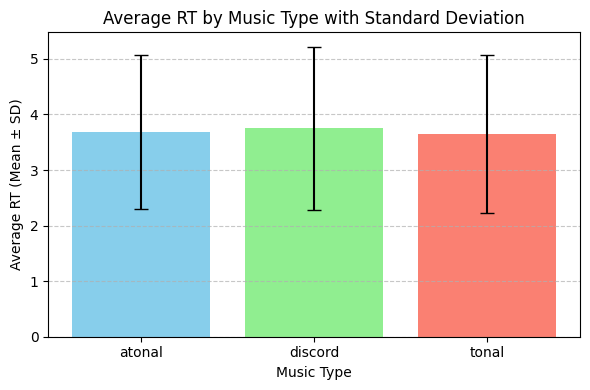

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "RT"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Perform ANOVA to check for significant differences between music types
tonal = data[data["music_type"] == "tonal"]["RT"]
atonal = data[data["music_type"] == "atonal"]["RT"]
discord = data[data["music_type"] == "discord"]["RT"]

f_stat, p_value = f_oneway(tonal, atonal, discord)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Significant differences detected in reaction time (RT) based on music type.")
    conclusion = "Music type has a significant effect on reaction time (RT)."
else:
    print("No significant differences detected in reaction time (RT) based on music type.")
    conclusion = "Music type does not have a significant effect on reaction time (RT)."

# Calculate mean and standard deviation of RT for each music type
summary_stats = data.groupby("music_type")["RT"].agg(["mean", "std"]).reset_index()

# Plot the bar chart with error bars
plt.figure(figsize=(6, 4))
plt.bar(
    summary_stats["music_type"], 
    summary_stats["mean"], 
    yerr=summary_stats["std"], 
    capsize=5, 
    color=["skyblue", "lightgreen", "salmon"]
)

# Add labels, title, and grid
plt.xlabel("Music Type")
plt.ylabel("Average RT (Mean ± SD)")
plt.title("Average RT by Music Type with Standard Deviation")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**2. Correlation between Music type and Heart Beat (average PPG)**

ANOVA F-statistic: 0.01, p-value: 0.9905
No significant differences detected between music types.


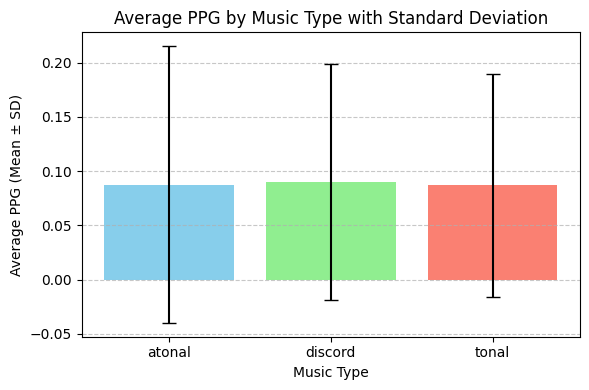

In [6]:
# Import necessary libraries for file handling and data processing
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "PPG_data"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Group data by participant_id and music_type, then calculate the mean PPG_data for each group
average_ppg = data.groupby(["participant_id", "music_type"])["PPG_data"].mean().reset_index()

# Calculate the overall mean PPG for each participant across all music types
participant_means = average_ppg.groupby("participant_id")["PPG_data"].mean()

# Filter participants to include only those with average PPG in the range [-1, 1]
valid_participants = participant_means[(participant_means >= -1) & (participant_means <= 1)].index
filtered_data = average_ppg[average_ppg["participant_id"].isin(valid_participants)]

# Perform ANOVA to check for significant differences between music types
tonal = filtered_data[filtered_data["music_type"] == "tonal"]["PPG_data"]
atonal = filtered_data[filtered_data["music_type"] == "atonal"]["PPG_data"]
discord = filtered_data[filtered_data["music_type"] == "discord"]["PPG_data"]

f_stat, p_value = f_oneway(tonal, atonal, discord)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences detected between music types!")
else:
    print("No significant differences detected between music types.")

# Calculate the mean and standard deviation for each music type
summary_stats = filtered_data.groupby("music_type")["PPG_data"].agg(["mean", "std"]).reset_index()

# Plot the bar chart with error bars
plt.figure(figsize=(6, 4))
plt.bar(
    summary_stats["music_type"], 
    summary_stats["mean"], 
    yerr=summary_stats["std"], 
    capsize=5, 
    color=["skyblue", "lightgreen", "salmon"]
)

# Add labels, title, and grid
plt.xlabel("Music Type")
plt.ylabel("Average PPG (Mean ± SD)")
plt.title("Average PPG by Music Type with Standard Deviation")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**3. Correlation between music type and Introspective sensitivity**

Correlation between music type and Introspective sensitivity: 0.047
                  sum_sq      df         F    PR(>F)
C(music_type)   0.077576     2.0  1.927372  0.145899
Residual       29.462748  1464.0       NaN       NaN


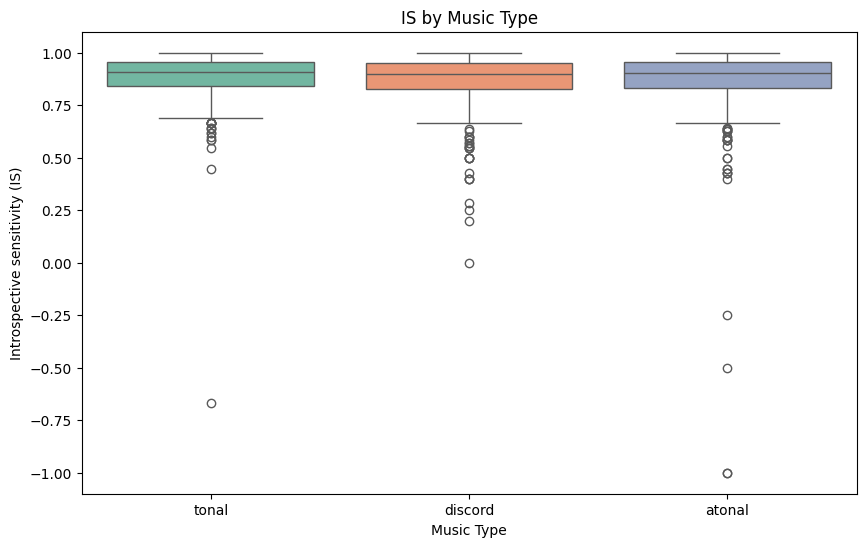

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm



def analyze_music_type_vs_IS(trial_combined_path = str):
    """
    Analyze the relationship between 'music_type' and 'IS'.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing 'music_type' and 'IS' columns.

    Returns:
        tuple: Correlation value and ANOVA table.
    """
    # Reading the file
    df = pd.read_excel(trial_combined_path)

    # 1. Correlation between 'music_type' and 'IS'
    df['music_type_numeric'] = df['music_type'].astype('category').cat.codes  # Convert music_type to numeric
    correlation = df['music_type_numeric'].corr(df['IS'])
    print(f"Correlation between music type and Introspective sensitivity: {correlation:.3f}")

    # 2. ANOVA test for 'music_type' and 'IS'
    model = ols('IS ~ C(music_type)', data=df).fit()  # Fit the model
    anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA
    print(anova_table)

    # 3. Graph of IS vs music_type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_type', y='IS', data=df, palette="Set2", hue='music_type')
    plt.title('IS by Music Type')
    plt.xlabel('Music Type')
    plt.ylabel('Introspective sensitivity (IS)')
    #plt.savefig('graph.png')
    plt.show()


trial_combined_path = (
    r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
)
analyze_music_type_vs_IS(trial_combined_path)